In [1]:
import numpy as np
from SequentialPOVMMeasurement import SequentialPOVMMeasurement, SequentialPOVMMeasurementCircuit
import qiskit
from qiskit import *
from utilities import simple_povm_xyz, povm_tetrahedron, get_rotation_gate
from POVM import POVM
from qiskit.extensions import UnitaryGate
from ProbabilisticMeasurement import ProbabilisticMeasurement

In [2]:
omega = 0.5

lamb = (np.cos(omega)**2)/2

phi1 = np.cos(omega)*np.array([1, 0]) + np.sin(omega)*np.array([0, 1])

phi2 = np.cos(omega)*np.array([1, 0]) - np.sin(omega)*np.array([0, 1])

phi1T = np.sin(omega)*np.array([1, 0]) - np.cos(omega)*np.array([0, 1])

phi2T = np.sin(omega)*np.array([1, 0]) + np.cos(omega)*np.array([0, 1])

A1 = (1/2)*np.array([[np.tan(omega)**2, np.tan(omega)], [np.tan(omega), 1]])

A2 = (1/2)*np.array([[np.tan(omega)**2, -np.tan(omega)], [-np.tan(omega), 1]])

A_u = np.array([[1 - np.tan(omega)**2, 0], [0, 0]])

POVM([A1, A2, A_u]).validation()

True

[ 0.87758256 -0.47942554]
This circuit measured A1 when the results were 11 and A2 when results were 01



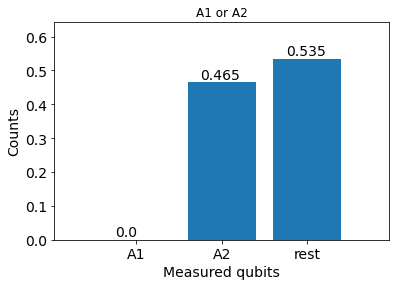

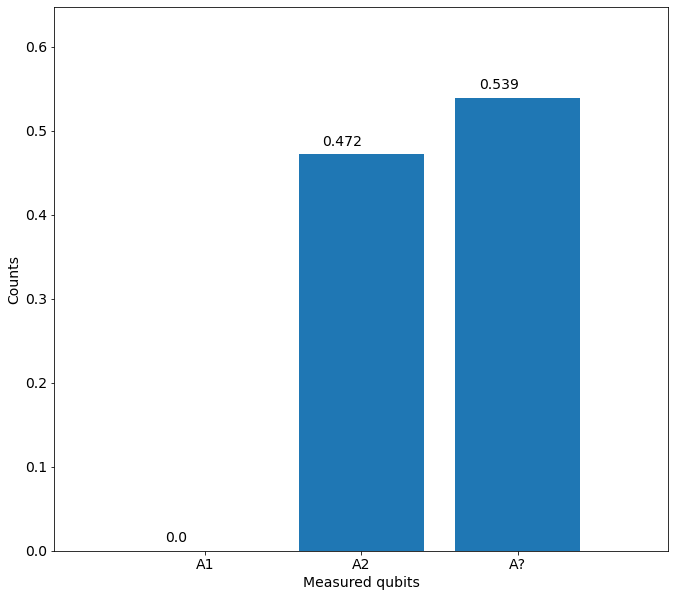

In [3]:
backend = qiskit.Aer.get_backend("qasm_simulator")


# Initialize the object using POVM effects and assign labels to them
seq = SequentialPOVMMeasurement([A1, A2, A_u], ["A1", "A2", "A?"])

# Prepare measured state
prepared_state = QuantumCircuit(1, 1)
initial_state = phi2/np.linalg.norm(phi2)
prepared_state.initialize(initial_state, 0)

prepared_state.draw("mpl")

print(initial_state)

# Make list of SequentialPOVMMeasurementCircuit objects which will measure the effects using this partition
circuits = seq.make_circuits([["A1", "A2"], ["A?"]], prepared_state)
circuit1 = circuits[0]


print(f"This circuit measured {circuit1.one.label} when the results were {circuit1.one_result} and {circuit1.zero.label} when results were {circuit1.zero_result}\n")

job_0 = qiskit.execute(circuit1.q_circuit, backend, shots=1000)
circuit1.plot_histogram(job_0.result().get_counts(), circuit1.one.label + ' or ' + circuit1.zero.label)

# print(f"This circuit measured {circuit2.one.label} when the results were {circuit2.one_result} and {circuit2.zero.label} when results were {circuit2.zero_result}\n")
#
# job_0 = qiskit.execute(circuit2.q_circuit, backend, shots=1000)
# circuit2.plot_histogram(job_0.result().get_counts(), circuit2.one.label + ' or ' + circuit2.zero.label)

prob = ProbabilisticMeasurement([A1, A2, A_u], ["A1", "A2", "A?"])
results = prob.measure(prepared_state)

prob.plot_histogram(results)


In [4]:
seq.measure([["A1", "A2"], ["A?"]], prepared_state)

[0, 447, 0]